<a href="https://colab.research.google.com/github/otanet/hannari_NLP_hands_on_2022/blob/main/Transformer%E3%81%AENLP%E3%81%AE%E6%B4%BB%E7%94%A8%E3%81%B8_20220318_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TransformerのNLPの活用  
GiNZAのライブラリを用いると、以下の3つの言語処理が可能です。  
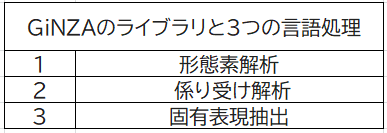

これ以降は、事前学習モデルを用いて、主に以下の5つの大規模データセットを用いた言語処理が可能となります。
いずれも、Haggingface社の公開しているTransformerの事前学習モデルに伴うライブラリを使用します。  
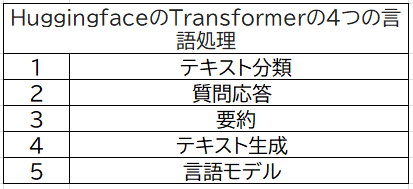




## (個人的な感じ)
今回、BERTの活用に際し、NLTKをはじめとした自然言語処理のライブラリは英語が対象です。spaCyやProdigyなどいくつかあります。

しかし、日本語対応にしたものとなると、GiNZAとHuggingfaceとで動かすなど、選択肢は少なくなります。

当初はBERTの実装を予定していましたが、まずは、既存のものを動かし体感して、それでも手の届かない部分は、改めて、取り組むように、順を追いたいと思っています。

今回は大枠を知ることを第一に考えています。

## まずは、GiNZAをインストールして、基本的な言語処理を体感しましょう！


## 形態素解析とは
文章を形態素という言葉の最小単位に分割する処理のこと。
併せて、それぞれの品詞や見出し語を判別します。

※言葉の最小単位を、トークンと言い、トークン化とも言います。
→形態素解析=トークン化

・トークン化：文を言葉の最小単位に分割する処理のこと
・品詞タグ付け：トークン化の品詞を判別しそれをタグ付けする処理のこと
・レンマ化：トークンを辞書の見出し語に変換する処理のこと

In [ ]:
# GiNZAのインストール
!pip install ginza==4.0.5

# メニュー「ランタイム → ランタイムを再起動」で「Google Colab」を再起動

In [ ]:
# トークン化の例
import spacy

nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

for token in doc:
    print(token)

## トークンの分割単位とGiNZAの設定
トークンは言葉の最小単位ですが、決まった定義はなく、その時々で決めます。
GiNZAには3つの段階があります。  

例）国家公務員  
  
A:国家/公務/員  
B:国家/公務員  
C:国家公務員  
  
※ ginza.set_split_model()を使用します。  

例）国家公務員  
A:国家/公務/員  

In [ ]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
ginza.set_split_mode(nlp, 'A') # 分割単位Aを指定
doc = nlp('私は霞が関の国家公務員です')

for token in doc:
    print(token)

例）国家公務員  
B:国家/公務員  

In [ ]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
ginza.set_split_mode(nlp, 'B') # 分割単位Bを設定
doc = nlp('私は霞が関の国家公務員です')

for token in doc:
    print(token)

例）国家公務員  
C:国家公務員  

In [ ]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
ginza.set_split_mode(nlp, 'C') # 分割単位C
doc = nlp('私は霞が関の国家公務員です')

for token in doc:
    print(token)

## 品詞タグ付け
品詞タグ付けには、SudachiPyによる品詞タグ付けと、Universal Dependenciesの品詞タグ付けとがあります。  

※特徴  
SudachiPyは日本語に適しています。  
Universal Dependenciesは多言語の横断的な学習に適しています。  

In [ ]:
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

for token in doc:
    print(
        token.text+', '+ # テキスト
        token.tag_+', '+ # SudachiPyの品詞タグ
        token.pos_) # Universal Dependenciesの品詞タグ

## レンマ化  
トークンを辞書の見出し語に変換する処理のことです。 
辞書の見出し語にそろえると、異なる表記でも同じ単語であることを判別できるようになります。  
  
例）
行か(ない)→行く  
行き(ます)→行く  
行く(。)→行く  
行く時→→行く  
行け(ば)→行く  
行こ(う)→行く  
  
※五段活用の一部のイメージです。  

In [ ]:
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

for token in doc:
    print(
        token.text+', '+ # テキスト
        token.lemma_) # レンマ化 

## 文境界解析  
複数の文章を文に解析する処理のことです。  
日本語には、句点(。)がありますが、「?」や「!」で区切られている場合もあります。  
  
例）『彼は「面白い！」とつぶやいた。』  
→会話文が内包されているケースもあり、こういう場合は処理が難しくなります。  

In [ ]:
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文境界解析
for span in doc.sents:
    print(span)

In [ ]:
#spanをfor文で回してトークンクラスを取得する
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文境界解析+トークン化
for span in doc.sents:
    for token in span:
        print(token)

## 文節分割
小学校か中学校で、「ね」で区切るのが文節分割に当たります。
日本語は、この文節で分割した方が解析しやすくなる場合もあります。

In [ ]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文節分割
for sent in doc.sents:
    for span in ginza.bunsetu_spans(sent):
        print(span)

### 文節分割：文節分割+トークン化の場合  
こちらの方が、しっくりくる感じがします。  


In [ ]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
doc = nlp('銀座でランチをご一緒しましょう。今度の日曜日はどうですか。')

# 文節分割+トークン化
for sent in doc.sents:
    for span in ginza.bunsetu_spans(sent):
        for token in span:
            print(token)

## 未知語の発見
## Sudachiのユーザー辞書にcsv形式で登録して、対応します。


In [ ]:
import spacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルに買収されたモトローラ')

#「となりのトトロ」が標準辞書で未対応であることを確認。
for token in doc:
    print(token)

## 係り受け解析(構文解析)とは、
文章を文節や単語に分割した後で、係り受け関係(どの語がどの語を修飾しているか)を識別する処理のことです。  
言語学でいう構文解析に当たります。   

※1 ディープラーニングが出てくる前はCaboChaやKakashiなどがそのツールとしてありました。  
※2 今では、SpaCyなど多言語対応の係り受け解析器が使われています。  


In [ ]:
# GiNZAのインストール
!pip install ginza==4.0.5

# メニュー「ランタイム → ランタイムを再起動」で「Google Colab」を再起動

In [ ]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文節の係り受け解析
for span in ginza.bunsetu_spans(doc): #ginza.bunsetu_spansをfor文で回して文を分割した文節を取得する
    for token in span.lefts: #span.leftsでその文節にかかっているトークンを取得する
        print(str(ginza.bunsetu_span(token))+' → '+str(span)) #ginza.bunsetu_spanで、そのトークンが含まれている文節を取得する

## 主辞(文節で重要な単語)を抽出
ginza.bunsetu_phrase_spans()を用いる。

In [ ]:
import spacy
import ginza
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 文節の係り受け解析
for span in ginza.bunsetu_phrase_spans(doc): #ginza.bunsetu_phrase_spans()を用いて主辞を取得する
    for token in span.lefts:
        print(str(ginza.bunsetu_phrase_span(token))+' → '+str(span))

### コラム 日本語と英語との係り受け構文結果の違い
日本語の文節係り受けは非交差的で、単方向になります。
一方、英語は逆のイメージになります。


## 単語の係り受け解析  
単語の係り受け関係を木構造で表示します。  
この木は閉路のないグラフを指します。  
各単語は木の頂点に対応して、1つの親に対して、複数の子を持つことになります。  
「親→子」

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('ja_ginza')
doc = nlp('グーグルはモトローラを買収した。')

# 単語の係り受け解析
for token in doc:
    print(token.text+' ← '+token.head.text+', '+token.dep_)

# グラフ表示
displacy.render(doc, style='dep', jupyter=True)

In [ ]:
# シンプルなグラフ表示
displacy.render(doc, style='dep', jupyter=True, options={'compact':True, 'distance': 90})

## Huggingface Transformerの活用

Haggingface社の公開しているTransformerの事前学習モデルに伴うライブラリを使用します。
Huggingfaceのライブラリを用いると、主に4つのタスクを行うことができます。

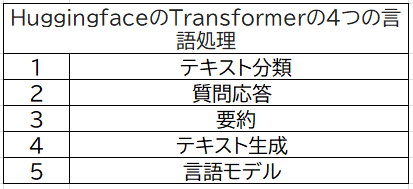

In [ ]:
# pipからのHuggingface Transformersのインストール
!pip install transformers[ja]==4.4.2

In [ ]:
from transformers import pipeline

# テキスト分類のパイプラインの準備
nlp = pipeline('sentiment-analysis')

# テキスト
text = 'This movie was very funny.'

# 推論
print(nlp(text))

In [ ]:
from transformers import pipeline

# 質問応答のパイプラインの準備
nlp = pipeline('question-answering')

# コンテキスト
context = 'Huggingface Transformers is a deep learning framework provided by Huggingface that specializes in natural language processing. It supports both TensorFlow and PyTorch. You can use deep learning to solve natural language processing tasks such as text classification, question answering, and summary.'

# 質問
question = 'What is a natural language processing task?'

# 推論
print(nlp(question=question, context=context))

In [ ]:
from transformers import pipeline

# 要約のパイプラインの準備
summarizer = pipeline('summarization')

# テキスト
text = 'Huggingface Transformers is a deep learning framework provided by Huggingface that specializes in natural language processing. It supports both TensorFlow and PyTorch. You can use deep learning to solve natural language processing tasks such as text classification, question answering, and summary.'

# 推論
print(summarizer(text, max_length=20, min_length=10))

In [ ]:
from transformers import pipeline

# テキスト生成のパイプラインの準備 (1)
text_generator = pipeline('text-generation')

# テキスト
text = 'Once upon a time there was an old man and an old woman.'

# 推論 (2)
print(text_generator(text, max_length=100, min_length=50))

In [ ]:
from transformers import pipeline

# MLMのパイプラインの準備
nlp = pipeline('fill-mask')

# 推論
print(nlp(f'Once upon a time there was an old man and an old {nlp.tokenizer.mask_token}.'))

In [ ]:
from transformers import pipeline

# 固有表現抽出のパイプラインの準備
nlp = pipeline('ner')

# テキスト
text = 'Hansel and Gretel go looking for food.'

# 推論
print(nlp(text))

In [ ]:
from transformers import pipeline

# 翻訳のパイプラインの準備
nlp = pipeline('translation_en_to_de')

# テキスト
text = 'Hansel and Gretel go looking for food.'

# 推論
print(nlp(text, max_length=40, min_length=1))

## まとめと考察  
GiNZAのインストール  
1.形態素解析  
2.トークンの分割単位  
3.品詞タグ付け  
4.レンマ化  
5.文境界解析  
6.文節分割  
7.未知語とその対応  
8.係り受け解析  
9.主辞(文節で重要な単語)の抽出  
10.単語の係り受け解析  
11.Huggingface Transformerの活用に向けて  

## 考察：  
係り受け解析の結果だけでも、英語と日本語の相違が見受けられました。  
これ以降は、ファインチューニングしながら、各々のタスクに対して、欠けていることを検討し、少しでも改善することが求められています。  
  
この段階になると、形態素解析のトークンの程度や固有表現抽出の細かな設定を加味して、コスト・ベネフィットで進めてゆくものと思います。  

参考文献一覧
参考文献一覧

displaCy Named Entity Visualizer · Explosion
https://explosion.ai/demos/displacy-ent

Explosion.aiのdisplaCy
https://explosion.ai/demos/displacy ## Explosion.aiのdisplaCy

日本語Winograd Schema Challengeの構築と分析
言語処理学会 第21回年次大会 発表論文集 (2015年3月)
https://www.anlp.jp/proceedings/annual_meeting/2015/pdf_dir/E3-1.pdf

displaCy Dependency Visualizer · Explosion
https://explosion.ai/demos/displacy

※Pythonによる自然言語処理ハンズオン1 資料 2022/02/25
https://www.slideshare.net/otanet/python-nlp-handson20220225v5

共参照解析のための事象間関係知識の文脈化
http://naoya-i.github.io/resources/nlp2014-paper.pdf

Language modeling
https://huggingface.co/docs/transformers/tasks/language_modeling

Text classification
https://huggingface.co/docs/transformers/tasks/sequence_classification

Pipelines for inference
https://huggingface.co/docs/transformers/pipeline_tutorial